## Assignment 2: Image Classification - Pneumonia Detection (Chest Xray)

### Group Members: Javeria Ishaque (22607), Naima Khan (22897), Sameen Amna (22317), Nabiha Tariq (22592), Suha Ahmed (22602)


In [3]:
!pip install opendatasets

In [4]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [5]:
import opendatasets as od

In [20]:
#https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/

df=od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/", force=True)

100%|█████████████████████████████████████████████████████████████████████████████| 2.29G/2.29G [14:09<00:00, 2.90MB/s]


In [ ]:
from PIL import Image
import os

In [2]:
!pip install opencv-python

In [22]:
!pip install keras

In [23]:
!pip install tensorflow

Number of training images: 5216
Number of testing images: 624


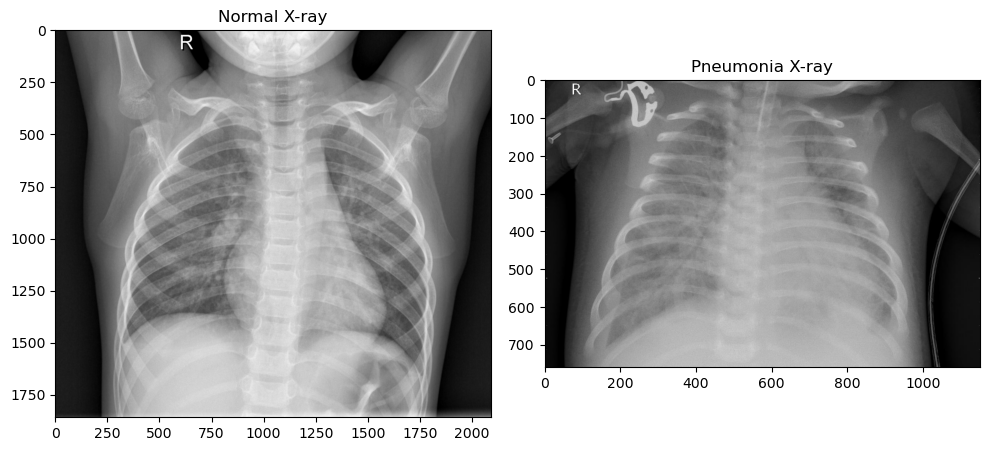

In [4]:
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import opendatasets as od

# Define the path where data was downloaded
data_dir = './chest-xray-pneumonia'

# Load the data (if it's not already present)
if not os.path.exists(data_dir):
    od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/", force=True)

# Check the contents of the data directory
train_dir = os.path.join(data_dir, 'chest_xray', 'train')
test_dir = os.path.join(data_dir, 'chest_xray', 'test')

# Count the number of images in train and test directories
num_train_images = len(os.listdir(os.path.join(train_dir, 'NORMAL'))) + len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_test_images = len(os.listdir(os.path.join(test_dir, 'NORMAL'))) + len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))

print(f"Number of training images: {num_train_images}")
print(f"Number of testing images: {num_test_images}")

# Visualize sample images (adjust paths and visualize a few images)
sample_normal_image = os.path.join(train_dir, 'NORMAL', os.listdir(os.path.join(train_dir, 'NORMAL'))[0])
sample_pneumonia_image = os.path.join(train_dir, 'PNEUMONIA', os.listdir(os.path.join(train_dir, 'PNEUMONIA'))[0])

# Display sample images using OpenCV and Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(sample_normal_image), cmap='gray')
plt.title('Normal X-ray')

plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(sample_pneumonia_image), cmap='gray')
plt.title('Pneumonia X-ray')

plt.tight_layout()
plt.show()


In [5]:
#Create directories and arrays for the images
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the path where data was downloaded
data_dir = './chest-xray-pneumonia'

# Load the data (if it's not already present)
if not os.path.exists(data_dir):
    od.download("https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/", force=True)

# Define the paths to train and test directories
train_dir = os.path.join(data_dir, 'chest_xray', 'train')
test_dir = os.path.join(data_dir, 'chest_xray', 'test')

# Function to load and preprocess images
def load_and_preprocess_images(image_dir):
    images = []
    labels = []
    for class_name in ['NORMAL', 'PNEUMONIA']:
        class_dir = os.path.join(image_dir, class_name)
        for image_file in os.listdir(class_dir):
            image = cv2.imread(os.path.join(class_dir, image_file), cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (128, 128))  # Resize the images to a common size (adjust as needed)
            images.append(image)
            labels.append(class_name)
    return np.array(images), np.array(labels)

In [6]:
# Load and preprocess images for both training and testing sets
X_train, y_train = load_and_preprocess_images(train_dir)
X_test, y_test = load_and_preprocess_images(test_dir)

# Convert class labels to binary (0 for 'NORMAL' and 1 for 'PNEUMONIA')
y_train = (y_train == 'PNEUMONIA').astype(int)
y_test = (y_test == 'PNEUMONIA').astype(int)


# Print the shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5216, 128, 128)
X_test shape: (624, 128, 128)
y_train shape: (5216,)
y_test shape: (624,)


In [7]:
import os
import cv2
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
# Combine the arrays

# Define a custom image preprocessor pipeline using sklearn
class ImagePreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Normalize the pixel values
        X_processed = X / 255.0
        return X_processed

# Create the image preprocessor pipeline
image_pipeline = Pipeline([
    ('preprocessor', ImagePreprocessor())
])

# Preprocess the images
X_train_processed = image_pipeline.fit_transform(X_train)
X_test_processed = image_pipeline.transform(X_test)

print(len(X_train_processed))
print(len(X_train))

5216
5216


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

# Define a pipeline for Support Vector Machine (SVM)
svm_pipeline = Pipeline([
    ('svm', SVC(kernel='linear'))  # Replace 'kernel' with the appropriate kernel for your problem
])

# Define a pipeline for Decision Tree
dt_pipeline = Pipeline([
    ('decision_tree', DecisionTreeClassifier())
])

# Define a pipeline for Random Forest
rf_pipeline = Pipeline([
    ('random_forest', RandomForestClassifier(n_estimators=100))  # You can adjust n_estimators as needed
])

# Define a pipeline for Naive Bayes
nb_pipeline = Pipeline([
    ('naive_bayes', GaussianNB())
])

# Define a pipeline for Stochastic Gradient Descent (SGD)
sgd_pipeline = Pipeline([
    ('sgd', SGDClassifier())
])


In [9]:
# Define models
svm_classifier = SVC()  # Support Vector Machine
dt_classifier = DecisionTreeClassifier()  # Decision Tree
rf_classifier = RandomForestClassifier()  # Random Forest
nb_classifier = GaussianNB()  # Naive Bayes Classifier
sgd_classifier = SGDClassifier()  # Stochastic Gradient Descent


In [10]:
# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Now, X_train_flat and X_test_flat are two-dimensional arrays with shape (number_of_images, num_pixels)


In [8]:
print("X_train_processed shape:", X_train_processed.shape)
print("y_train shape:", y_train.shape)


X_train_processed shape: (5216, 128, 128)
y_train shape: (5216,)


for model, model_name in zip(pipelines, model_names):
    model.fit(X_train_flat, y_train)  # Assuming y_train is the target variable for training
    y_pred = model.predict(X_test_flat)


In [11]:
# Hyperparameters
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

pipelines =  [svm_pipeline, dt_pipeline, rf_pipeline, nb_pipeline, sgd_pipeline]
model_names = ['SVM','Decision Tree', 'Random Forest', 'Naive Bayes', 'Stochastic Gradient Descent']

# Define the pipeline for the SVM classifier
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svm', SVC())  # Support Vector Classifier
])

# Define the hyperparameter grid for SVM (Reduced for faster execution)
param_grid_svm = {
    'svm__C': [0.1, 1],  # Specify 'C' as 'svm__C'
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': [0.001, 0.01]
}


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline for the Decision Tree classifier
dt_pipeline = Pipeline([
    ('dt', DecisionTreeClassifier())
])

# Define the hyperparameter grid for Decision Tree (Reduced for faster execution)
param_grid_dt = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [None, 10]
}

# Define the pipeline for the Random Forest classifier
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier())
])

# Define the hyperparameter grid for Random Forest (Reduced for faster execution)
param_grid_rf = {
    'rf__n_estimators': [10, 50],
    'rf__max_depth': [None, 10]
}


In [13]:
# Hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define classifiers with minimal hyperparameters
classifiers = [
    {
        'name': 'SVM',
        'model': SVC(),
        'param_grid': {'C': [1], 'kernel': ['linear']},
    },
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None]},
    },
]



In [14]:

for classifier_info in classifiers:
    model = classifier_info['model']
    classifier_name = classifier_info['name']

    param_grid = classifier_info['param_grid']
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train_flat, y_train)
    best_model = grid_search.best_estimator_

    best_model.fit(X_train_flat, y_train)
    y_pred = best_model.predict(X_test_flat)

In [17]:

from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Initialize dictionaries to store evaluation results
results = {'Classifier': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [],'Confusion Matrix': []}

# Initialize dictionaries to store precision-recall and ROC curve data
precision_recall_curves = {}
roc_curves = {}

for model, model_name in zip(pipelines, model_names):
    model.fit(X_train_flat, y_train)
    y_pred = model.predict(X_test_flat)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Compute precision-recall curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)
    precision_recall_curves[model_name] = (precision_curve, recall_curve)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_curves[model_name] = (fpr, tpr)
    
    results['Classifier'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['Confusion Matrix'].append(confusion)
    
# Display results as a table
results_df = pd.DataFrame(results)
print(results_df)


                    Classifier  Accuracy  Precision    Recall  F1 Score  \
0                          SVM  0.750000   0.716667  0.992308  0.832258   
1                Decision Tree  0.743590   0.720307  0.964103  0.824561   
2                Random Forest  0.775641   0.738550  0.992308  0.846827   
3                  Naive Bayes  0.725962   0.775819  0.789744  0.782719   
4  Stochastic Gradient Descent  0.762821   0.730038  0.984615  0.838428   

         Confusion Matrix  
0   [[81, 153], [3, 387]]  
1  [[88, 146], [14, 376]]  
2   [[97, 137], [3, 387]]  
3  [[145, 89], [82, 308]]  
4   [[92, 142], [6, 384]]  


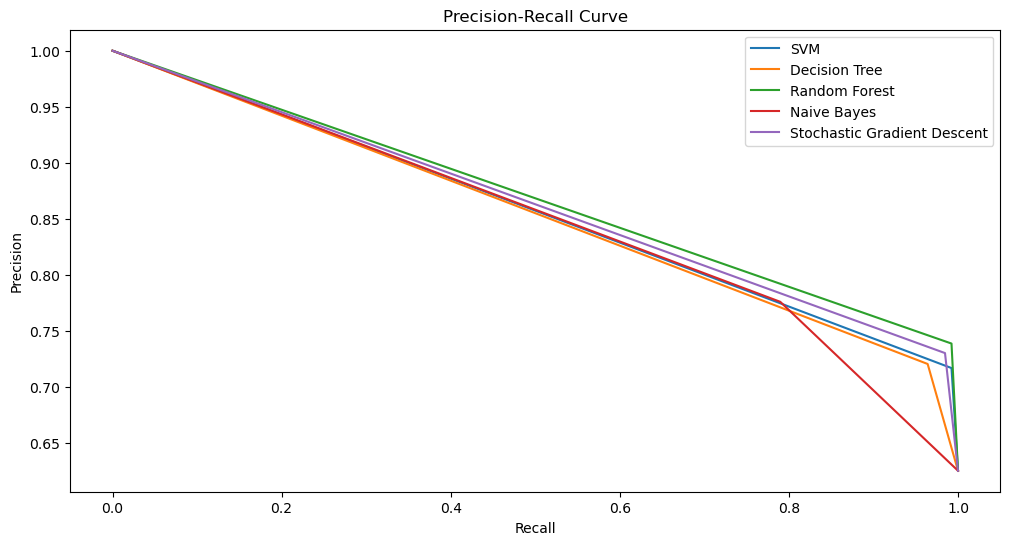

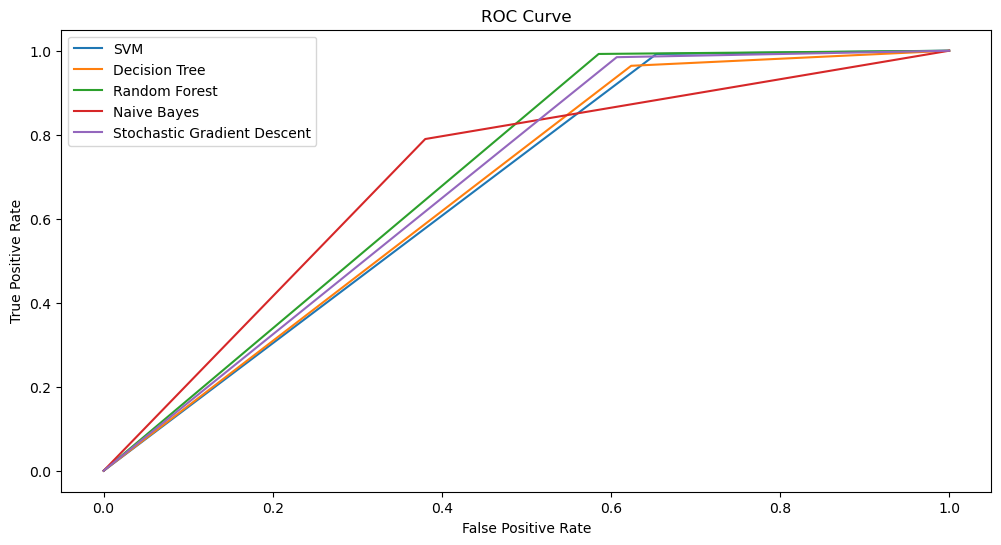

In [18]:
# Plot precision-recall curves
plt.figure(figsize=(12, 6))
for model_name, (precision_curve, recall_curve) in precision_recall_curves.items():
    plt.plot(recall_curve, precision_curve, label=model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Plot ROC curves
plt.figure(figsize=(12, 6))
for model_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=model_name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [19]:
# Using Ensembling Technique

from sklearn.ensemble import VotingClassifier

# Define the models you want to include in the ensemble
estimators = [
    ('SVM', svm_pipeline),
    ('Decision Tree', dt_pipeline),
    ('Random Forest', rf_pipeline),
    ('Naive Bayes', nb_pipeline),
    ('Stochastic Gradient Descent', sgd_pipeline)
]

# Create a Voting Classifier that combines the selected models
voting_classifier = VotingClassifier(estimators, voting='hard')

# Fit the ensemble model to the training data
voting_classifier.fit(X_train_flat, y_train)

# Make predictions using the ensemble model
ensemble_predictions = voting_classifier.predict(X_test_flat)

# Calculate accuracy, precision, recall, and F1 score for the ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions)
ensemble_recall = recall_score(y_test, ensemble_predictions)
ensemble_f1 = f1_score(y_test, ensemble_predictions)

# Display the ensemble's evaluation metrics
print("Ensemble Model Evaluation:")
print("Accuracy:", ensemble_accuracy)
print("Precision:", ensemble_precision)
print("Recall:", ensemble_recall)
print("F1 Score:", ensemble_f1)


Ensemble Model Evaluation:
Accuracy: 0.782051282051282
Precision: 0.7451737451737451
Recall: 0.9897435897435898
F1 Score: 0.8502202643171805
